In [ ]:
#import lib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import math
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/GoMyCode/titanic-passengers.csv',sep=';')

Data preprocessing

In [ ]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Dropping the Cabin column because 77% of its values are Nan
df.drop("Cabin",axis=1,inplace=True)
#replacing the Nan values in age with the mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
#printing the most common value in Embarked
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
#replacing the Nan values by the most common one
df['Embarked'].fillna('S',inplace=True)

Data visualization

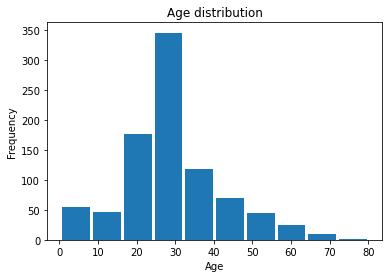

In [ ]:
#Age Histogram
plt.title('Age distribution')
plt.xlabel('Age')
df['Age'].plot.hist(rwidth=0.9)

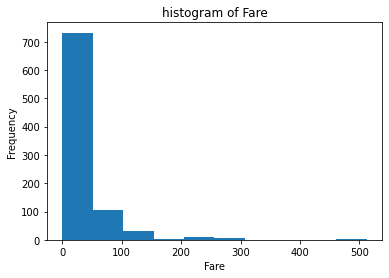

In [ ]:
 #Fare Histogram
plt.title("histogram of Fare")
plt.xlabel("Fare")
df['Fare'].plot.hist()

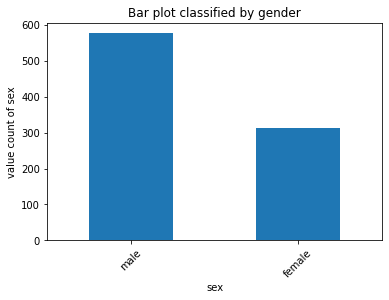

In [ ]:
#Bar plot of value count by gender
plt.xlabel("sex")
plt.ylabel("value count of sex")
plt.title("Bar plot classified by gender")
vc=df["Sex"].value_counts()
vc.plot.bar(rot=45)

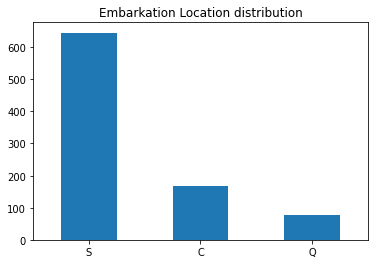

In [ ]:
#Embarkation bar plot
plt.title('Embarkation Location distribution')
plt.xlabel="Embarked"
plt.ylabel="Value count"
el=df['Embarked'].value_counts()
el.plot.bar(rot=1)

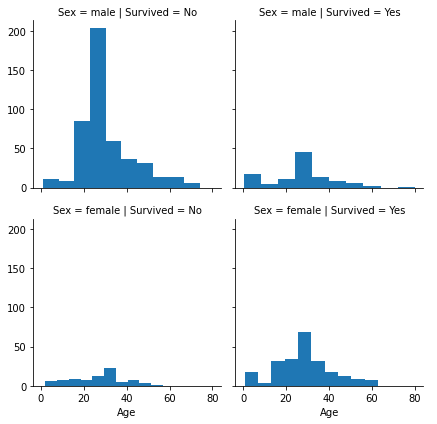

In [ ]:
#Correlation between Sex and Age and their importance in survival rate
grid=sns.FacetGrid(df,row="Sex",col="Survived")
grid.map(plt.hist,"Age",bins=10)
grid.add_legend()

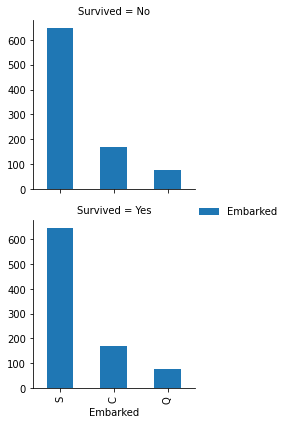

In [ ]:
#Correlation between Embarkation location and its importance in survival rate
grid=sns.FacetGrid(df,row="Survived")
vc1=df["Embarked"].value_counts()
grid.map(vc1.plot.bar,"Embarked")
grid.add_legend()

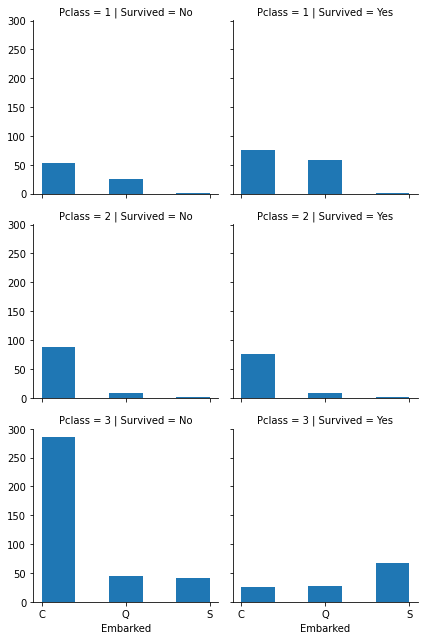

In [ ]:
#Correlation between passenger class ,embarkation location and their importance in survival rate
vc2=sns.FacetGrid(df,row="Pclass",col="Survived",height=3,aspect=1)
vc2.map(plt.hist,'Embarked',bins=5)

In [ ]:
#Heatmap function definition
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

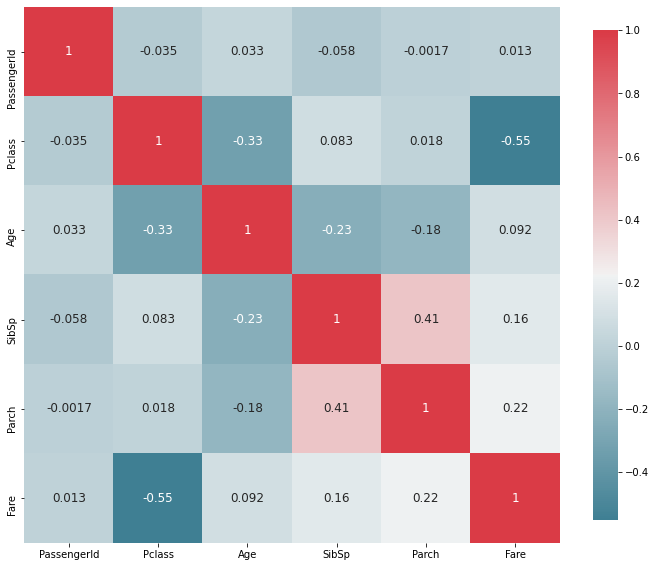

In [ ]:
plot_correlation_map(df)

In [ ]:
#creating a title dict
Title_Dictionary = {
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master"
                    }

In [ ]:
#Extracting the titles from the name column
df["Title"]=df.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [ ]:
#Replacing with titles in the name column
df["Title"].replace(Title_Dictionary,inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C,Mrs
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S,Mrs


In [ ]:
#Dropping the Name column since we replaced it with Title
df.drop("Name",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


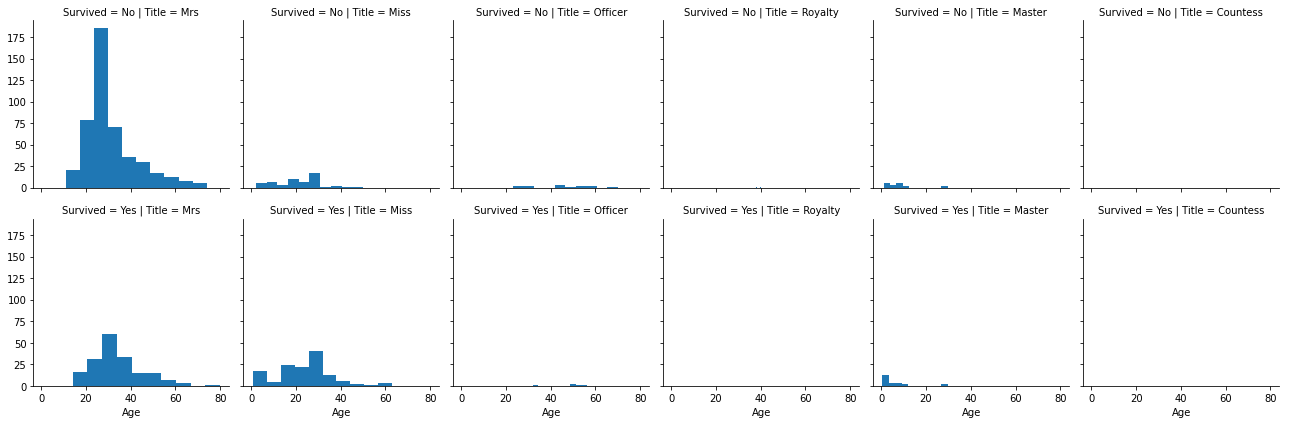

In [ ]:
#correlation between Title,age and survival
def correlation_between_features(data,row,col,f):
  grid=sns.FacetGrid(data,row,col)
  grid.map(plt.hist,f)
  grid.add_legend()
correlation_between_features(df,"Survived","Title","Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


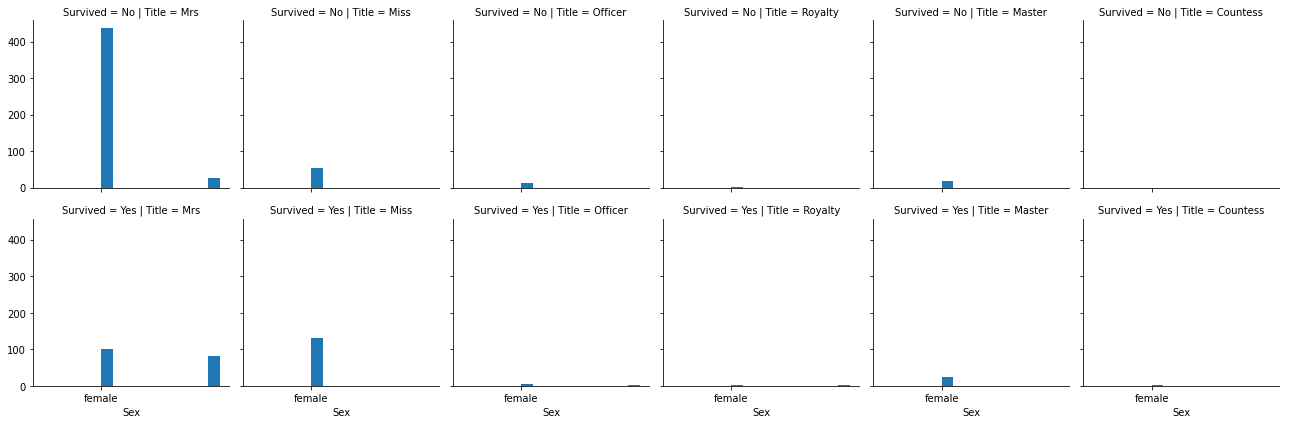

In [ ]:
#correlation between title,sex and survival
correlation_between_features(df,"Survived","Title","Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


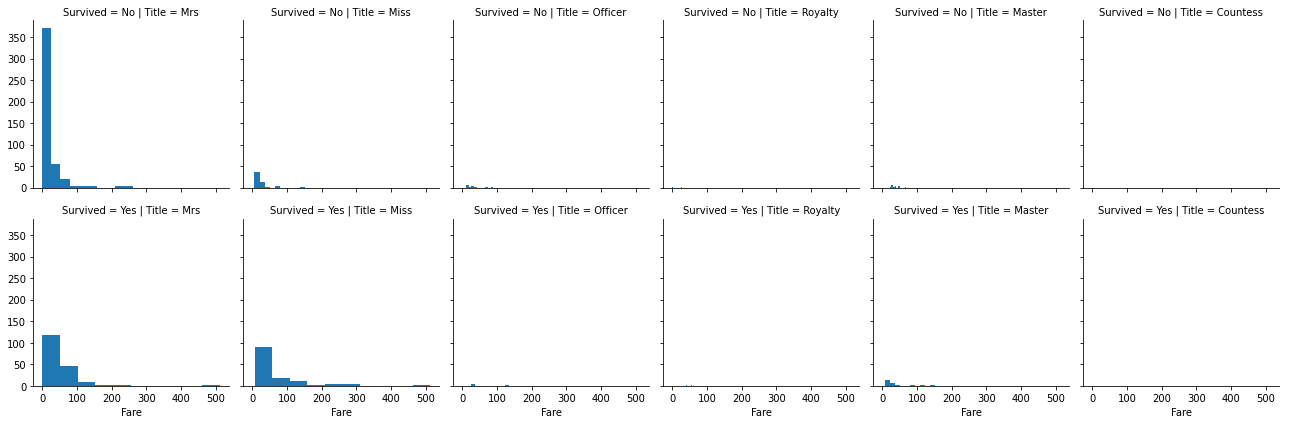

In [ ]:
correlation_between_features(df,"Survived","Title","Fare")

In [ ]:
#Creating a new feature FamilySize using Parch and SibSp
df['FamilySize']=df['Parch']+df['SibSp']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Title        891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


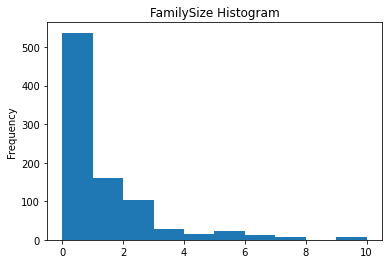

In [ ]:
#Familysize histogram
plt.title("FamilySize Histogram")
#plt.xlabel("Family Size")
df['FamilySize'].plot.hist()

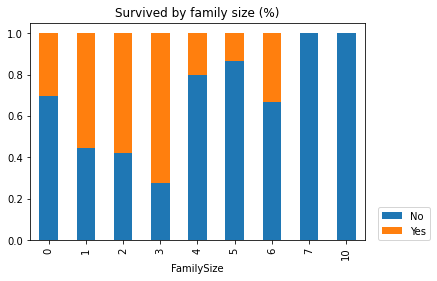

In [ ]:
#correlation between familysize and survival
pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').plot.bar(stacked=True, title="Survived by family size (%)").legend(loc=(1.04,0))

Logistic Regression

In [ ]:
#converting categorical data into numerical
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
embarked_transfom={
    "Embarked": {"C":0,"Q":1,"S":2}
}
df.replace(embarked_transfom,inplace=True)

In [ ]:
#convert survived variable into numerical
survived_transf={
    "Survived": {"No":0,"Yes":1}
}
df.replace(survived_transf,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mrs,0
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mrs,0
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mrs,0
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mrs,1


In [ ]:
#feature selection
x = df[['FamilySize','Sex','Pclass','Fare']]
y = df['Survived']
#splitting data with test size of 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#build our logistic model
logreg = LogisticRegression()
#fitting training data   
logreg.fit(x_train, y_train)  
#testing model’s performance
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


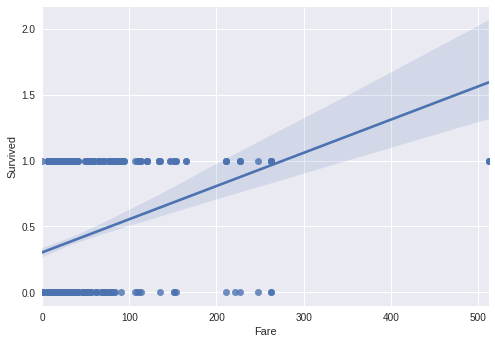

In [ ]:
sns.regplot(x='Fare',y='Survived',data=df)

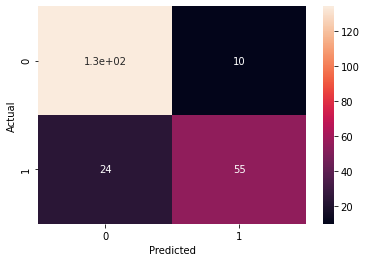

In [ ]:
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       144
           1       0.85      0.70      0.76        79

    accuracy                           0.85       223
   macro avg       0.85      0.81      0.83       223
weighted avg       0.85      0.85      0.84       223



The AUC-ROC curve helps us visualize how well our machine learning classifier is performing.
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
the Higher the AUC, the better the model is at distinguishing between people who survived and others who didn't.
In a multi-class model, we can plot N number of AUC ROC Curves for N number classes using the One vs ALL methodology.

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("the AUC score is:",auc_score)

the AUC score is: 0.8133790436005627


In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
#fixing the error I got with plt.xlabel "str object is not callable"
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

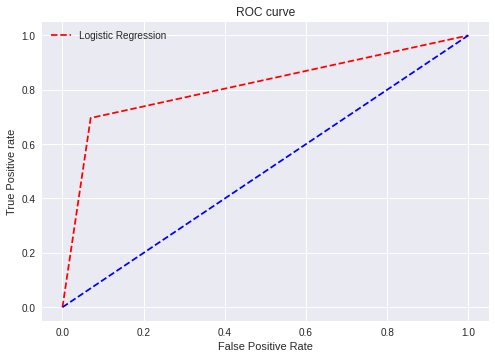

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();